# Pandas

## Series

- Single dimensional data structure
- Combination of series, can create a dataframe
- Anything you can do with a numpy array, you can also do with a pandas series


In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([74, 56, 26, 8, -13, 4])
s

0    74
1    56
2    26
3     8
4   -13
5     4
dtype: int64

- Index is a way to identify rows

In [3]:
s = pd.Series([74, 56, 26, 8, -13, 4])
s.sort_values()

4   -13
5     4
3     8
2    26
1    56
0    74
dtype: int64

In [4]:
letters = pd.Series(np.random.choice(list("abcdefghijklmnopqrstuvwxyz"), 100))
numbers = pd.Series(np.random.choice(np.arange(1, 101), 100))

In [5]:
numbers.astype("float")

0     85.0
1      1.0
2      4.0
3     74.0
4     15.0
      ... 
95     6.0
96    28.0
97    75.0
98    35.0
99    62.0
Length: 100, dtype: float64

In [6]:
letters == "a"

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [7]:
letters[letters == "a"]

9     a
22    a
41    a
65    a
82    a
90    a
dtype: object

- Vector - applies to a collection of things as opposed to a single thing

In [8]:
numbers

0     85
1      1
2      4
3     74
4     15
      ..
95     6
96    28
97    75
98    35
99    62
Length: 100, dtype: int64

In [9]:
numbers[numbers > 50]

0      85
3      74
6      89
7     100
8      88
11     99
13     75
14     89
16     91
18     94
23     52
24     68
27     60
28     54
29     73
30     95
33     80
35     77
38     83
40     98
41     61
43     85
45     53
47     53
49     90
51     61
53     75
54     64
55     68
56     95
58     77
59     97
60     65
62    100
64     94
65     81
67     77
69     97
71     54
72     80
73     62
75     58
77     98
79     51
80     64
82     84
87     76
89     57
90     99
92     85
97     75
99     62
dtype: int64

- "mask" is a term we use to describe true/false values

In [10]:
mask = numbers > 50
numbers[mask]

0      85
3      74
6      89
7     100
8      88
11     99
13     75
14     89
16     91
18     94
23     52
24     68
27     60
28     54
29     73
30     95
33     80
35     77
38     83
40     98
41     61
43     85
45     53
47     53
49     90
51     61
53     75
54     64
55     68
56     95
58     77
59     97
60     65
62    100
64     94
65     81
67     77
69     97
71     54
72     80
73     62
75     58
77     98
79     51
80     64
82     84
87     76
89     57
90     99
92     85
97     75
99     62
dtype: int64

In [11]:
greater_than_50_filter = numbers > 50
is_even_filter = numbers % 2 == 0
is_divisible_by_5 = numbers % 5 == 0
numbers[greater_than_50_filter & is_even_filter & is_divisible_by_5]

7     100
27     60
33     80
49     90
62    100
72     80
dtype: int64

- "~" in code acts as "not"

In [12]:
greater_than_50_filter = numbers > 50
is_even_filter = numbers % 2 == 0
numbers[~ greater_than_50_filter & is_even_filter & is_divisible_by_5]

19    20
44    20
52    40
81    30
dtype: int64

In [13]:
vowels = list("aeiou")
letters.isin(vowels)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [14]:
# below is equivalent to above:
(letters == "a") | (letters == "e") | (letters == "i") | (letters == "o") | (letters == "u")

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [15]:
"a" in vowels

True

In [16]:
vowels = list("aeiou")
letters[letters.isin(vowels)]

9     a
18    i
22    a
24    i
26    u
29    i
30    u
35    i
37    u
41    a
54    u
57    u
60    o
61    e
65    a
66    u
69    i
82    a
90    a
91    e
93    u
94    i
dtype: object

In [17]:
letters.isin(vowels).astype(int)

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Length: 100, dtype: int64

In [18]:
letters.isin(vowels).astype(int).sum()

22

In [19]:
letters.isin(vowels).sum()

22

In [20]:
letters[letters.isin(vowels)].sum()

'aiaiuiuiuauuoeauiaaeui'

In [21]:
letters[letters.isin(vowels)].shape

(22,)

In [22]:
letters[letters.isin(vowels)].size

22

In [23]:
(letters == "b").any()

True

In [24]:
(numbers > 0).all()

True

- .any() and .all() are aggregators

In [25]:
letters[letters.isin(vowels)].value_counts()

u    7
a    6
i    6
e    2
o    1
dtype: int64

- **expressions are evaluated inside out**

In [26]:
type(letters[letters.isin(vowels)])

pandas.core.series.Series

In [27]:
letters[letters.isin(vowels)].value_counts().max()

7

In [28]:
letters[letters.isin(vowels)].value_counts().sort_values().tail(1)

u    7
dtype: int64

- **above is an example of method chaining**

In [29]:
numbers.count(), numbers.mean(), numbers.std()

(100, 50.87, 31.405029192564978)

- above is a tuple

In [30]:
numbers.agg(["count", "mean", "std"])

count    100.000000
mean      50.870000
std       31.405029
dtype: float64

- above is a series

In [31]:
numbers.agg(["count", "mean", "std"])[0]

100.0

In [32]:
numbers.agg(["count", "mean", "std"])["mean"]

50.87

- can index by position or name of index

In [33]:
numbers.agg(["count", "mean", "std"]).head(1)

count    100.0
dtype: float64

In [34]:
numbers.agg(["count", "mean", "std"]).tail(1)

std    31.405029
dtype: float64

In [35]:
numbers.describe()

count    100.000000
mean      50.870000
std       31.405029
min        1.000000
25%       22.500000
50%       52.500000
75%       77.750000
max      100.000000
dtype: float64

In [36]:
numbers_summary = numbers.describe()
numbers_summary

count    100.000000
mean      50.870000
std       31.405029
min        1.000000
25%       22.500000
50%       52.500000
75%       77.750000
max      100.000000
dtype: float64

In [37]:
interquartile_range = numbers_summary["75%"] - numbers_summary["25%"]
interquartile_range

55.25

In [38]:
def is_divisible_by_4(n):
    if n % 4 == 0:
        return "Evenly divisible by four!"
    else:
        return "Not evenly divisible by four :("
    
numbers.apply(is_divisible_by_4) # equivalent to running a for loop

0     Not evenly divisible by four :(
1     Not evenly divisible by four :(
2           Evenly divisible by four!
3     Not evenly divisible by four :(
4     Not evenly divisible by four :(
                   ...               
95    Not evenly divisible by four :(
96          Evenly divisible by four!
97    Not evenly divisible by four :(
98    Not evenly divisible by four :(
99    Not evenly divisible by four :(
Length: 100, dtype: object

## Jupyter Notebook Best Practices

- variables and functions will exist in a notebook as long as you have the ketnal open
- close, open, and run all cells to remove references to the old unsed functions
- **frequently restart kernal and run the cells from top to bottom**

In [45]:
def bin_number(n):
    if n < 25:
        return "[0, 25)"
    elif n < 50:
        return "[25, 50)"
    elif n < 75:
        return "[50, 75)"
    else:
        return "[75, 101)"
    
numbers.apply(bin_number).value_counts().sort_index()

[0, 25)      28
[25, 50)     20
[50, 75)     20
[75, 101)    32
dtype: int64

In [47]:
numbers.value_counts(bins=4).sort_index()

(0.9, 25.75]      29
(25.75, 50.5]     19
(50.5, 75.25]     23
(75.25, 100.0]    29
dtype: int64

In [57]:
pd.cut(numbers, 4)

0     (75.25, 100.0]
1     (0.901, 25.75]
2     (0.901, 25.75]
3      (50.5, 75.25]
4     (0.901, 25.75]
           ...      
95    (0.901, 25.75]
96     (25.75, 50.5]
97     (50.5, 75.25]
98     (25.75, 50.5]
99     (50.5, 75.25]
Length: 100, dtype: category
Categories (4, interval[float64]): [(0.901, 25.75] < (25.75, 50.5] < (50.5, 75.25] < (75.25, 100.0]]

In [58]:
pd.cut(numbers, 4).value_counts().sort_index(ascending=False)

(75.25, 100.0]    29
(50.5, 75.25]     23
(25.75, 50.5]     19
(0.901, 25.75]    29
dtype: int64

In [59]:
pd.cut(numbers, 4, labels=["very small", "small", "large", "very large"]).value_counts().sort_index(ascending=False)

very large    29
large         23
small         19
very small    29
dtype: int64

## Binning Data

- pd.cut for ~ equal sized bins (by width; but maybe not the same number of values in each bin)
- pd.qcut for ~ the same number of values in each bin (but the bins might have different widths)

In [61]:
pd.cut(numbers, 8).value_counts().sort_index()

(0.901, 13.375]    14
(13.375, 25.75]    15
(25.75, 38.125]    13
(38.125, 50.5]      6
(50.5, 62.875]     13
(62.875, 75.25]    10
(75.25, 87.625]    12
(87.625, 100.0]    17
dtype: int64

In [62]:
pd.qcut(numbers, 8).value_counts().sort_index()

(0.999, 12.375]    13
(12.375, 22.5]     12
(22.5, 35.0]       14
(35.0, 52.5]       11
(52.5, 64.0]       13
(64.0, 77.75]      12
(77.75, 90.625]    12
(90.625, 100.0]    13
dtype: int64

In [64]:
# lowercase
numbers.apply(is_divisible_by_4).str.lower()

0     not evenly divisible by four :(
1     not evenly divisible by four :(
2           evenly divisible by four!
3     not evenly divisible by four :(
4     not evenly divisible by four :(
                   ...               
95    not evenly divisible by four :(
96          evenly divisible by four!
97    not evenly divisible by four :(
98    not evenly divisible by four :(
99    not evenly divisible by four :(
Length: 100, dtype: object

In [66]:
numbers.apply(is_divisible_by_4).str[:4]

0     Not 
1     Not 
2     Even
3     Not 
4     Not 
      ... 
95    Not 
96    Even
97    Not 
98    Not 
99    Not 
Length: 100, dtype: object

In [67]:
numbers.apply(is_divisible_by_4)[:4]

0    Not evenly divisible by four :(
1    Not evenly divisible by four :(
2          Evenly divisible by four!
3    Not evenly divisible by four :(
dtype: object

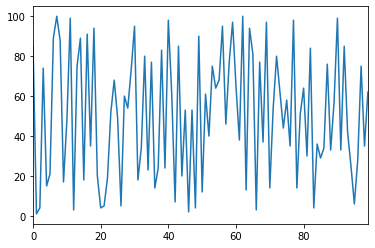

In [71]:
%matplotlib inline

numbers.plot()

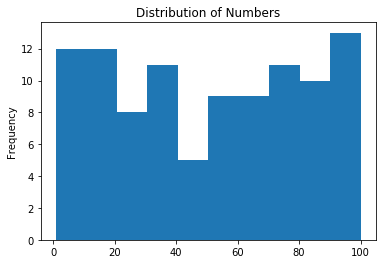

In [76]:
import matplotlib.pyplot as plt

numbers.plot.hist()
plt.title("Distribution of Numbers")
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

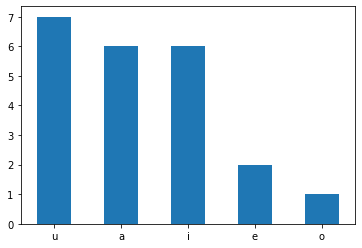

In [83]:
letters[letters.isin(vowels)].value_counts().plot.bar()
plt.xticks(rotation=0)

In [84]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [87]:
s[0] = 16
s

0    16
1     2
2     3
dtype: int64

In [89]:
pd.Series([1, 2, 3, np.nan, 4, 5, 6])

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
6    6.0
dtype: float64

In [90]:
pd.Series([1, 2, 3, np.nan, 4, 5, 6]).fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    4.0
5    5.0
6    6.0
dtype: float64

In [91]:
pd.__version__

'0.25.1'